In [76]:
#imports
import pandas as pd
import numpy as np

In [77]:
#read data file
cardio_disease=pd.read_csv(r'/content/cardio_disease.csv',sep=';',index_col=0)
cardio_disease

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393.0,2,168,62.0,110.0,80,1,1,0,0,1,0
1,20228.0,1,156,85.0,140.0,90,3,1,0,0,1,1
2,18857.0,1,165,64.0,130.0,70,3,1,0,0,0,1
3,17623.0,2,169,82.0,150.0,100,1,1,0,0,1,1
4,17474.0,1,156,56.0,100.0,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240.0,2,168,76.0,120.0,80,1,1,1,0,1,0
99995,22601.0,1,158,126.0,140.0,90,2,2,0,0,1,1
99996,19066.0,2,183,105.0,180.0,90,3,1,0,1,0,1


In [78]:
#check dataset info
cardio_disease.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69992 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        69994 non-null  float64
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 6.9 MB


In [79]:
#check dataset describe
cardio_disease.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69992.000000,70000.000000,70000.000000,70000.000000,69994.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.753600,1.349571,164.359229,74.205690,128.818184,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.341789,0.476838,8.210126,14.395757,154.017977,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


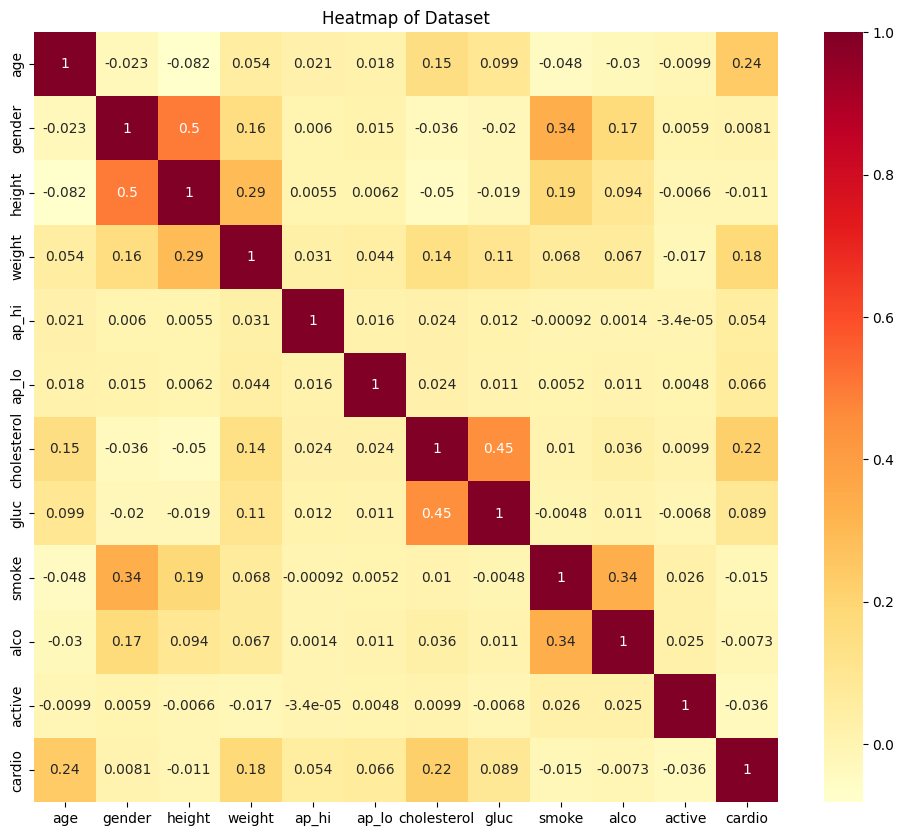

In [80]:
#heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(cardio_disease.corr(), annot=True, cmap='YlOrRd')
plt.title('Heatmap of Dataset')
plt.show()

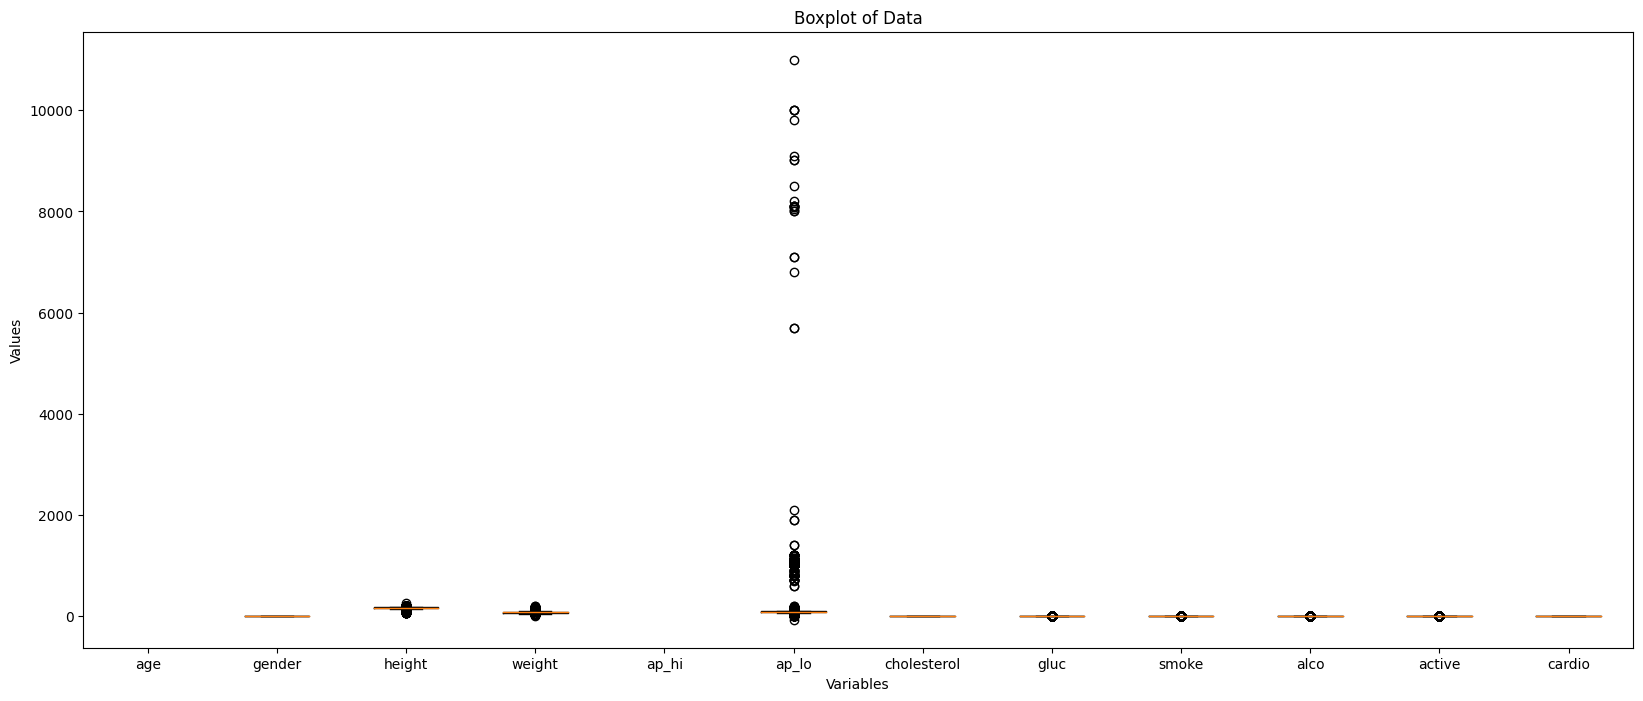

In [81]:
plt.figure(figsize=(20, 8))
plt.boxplot(cardio_disease)
plt.xticks(range(1, len(cardio_disease.columns)+1), cardio_disease.columns)

plt.title('Boxplot of Data')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

In [82]:
#Calculation of quartiles
q1 = np.percentile(cardio_disease, 25)
q3 = np.percentile(cardio_disease, 75)
iqr = q3 - q1

#Define a range to remove outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

#remove outliers
cleaned_data = cardio_disease[(cardio_disease >= lower_bound) & (cardio_disease <= upper_bound)]

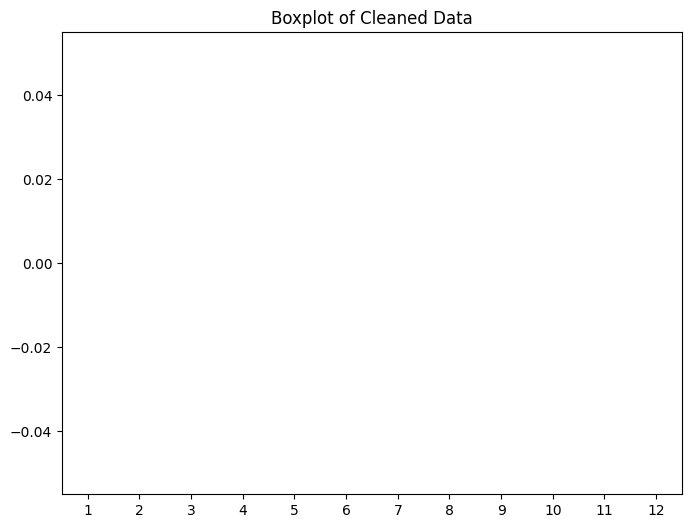

In [83]:
#check cleaning
plt.figure(figsize=(8,6))
plt.boxplot(cleaned_data)
plt.title('Boxplot of Cleaned Data')
plt.show()


In [84]:
#found count of nulls
cardio_disease.isnull().sum()

age            8
gender         0
height         0
weight         0
ap_hi          6
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [85]:
#Replacing nulls with mean
from sklearn.impute import SimpleImputer
i=SimpleImputer(missing_values=np.nan,strategy='mean')
i.fit(cardio_disease)
df=i.transform(cardio_disease)
cardio_disease=pd.DataFrame(df,index=cardio_disease.index, columns=cardio_disease.columns)
cardio_disease.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [86]:
#found count of duplicates
cardio_disease.duplicated().sum()

24

In [87]:
#remove duplicates
cardio_disease.drop_duplicates(inplace=True)
cardio_disease

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393.0,2.0,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
1,20228.0,1.0,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0
2,18857.0,1.0,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0
3,17623.0,2.0,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0
4,17474.0,1.0,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240.0,2.0,168.0,76.0,120.0,80.0,1.0,1.0,1.0,0.0,1.0,0.0
99995,22601.0,1.0,158.0,126.0,140.0,90.0,2.0,2.0,0.0,0.0,1.0,1.0
99996,19066.0,2.0,183.0,105.0,180.0,90.0,3.0,1.0,0.0,1.0,0.0,1.0


In [88]:
#Convert ages to year
cardio_disease['age']=cardio_disease['age']//365
cardio_disease

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.0,2.0,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
1,55.0,1.0,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0
2,51.0,1.0,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0
3,48.0,2.0,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0
4,47.0,1.0,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,52.0,2.0,168.0,76.0,120.0,80.0,1.0,1.0,1.0,0.0,1.0,0.0
99995,61.0,1.0,158.0,126.0,140.0,90.0,2.0,2.0,0.0,0.0,1.0,1.0
99996,52.0,2.0,183.0,105.0,180.0,90.0,3.0,1.0,0.0,1.0,0.0,1.0


In [89]:
#split x & y
x=cardio_disease.loc[:, cardio_disease.columns != "cardio"]
y=cardio_disease['cardio']

In [90]:
#normalization x
from sklearn.preprocessing import scale
scaled_x=scale(x)
x=pd.DataFrame(scaled_x,index=x.index, columns=x.columns)
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
id,,,,,,,,,,,
0,-0.419776,1.363824,0.443402,-0.847984,-0.122188,-0.088255,-0.539441,-0.395798,-0.310938,-0.238428,0.494183
1,0.319113,-0.733233,-1.018023,0.749559,0.072571,-0.035205,2.400316,-0.395798,-0.310938,-0.238428,0.494183
2,-0.271998,-0.733233,0.078046,-0.709067,0.007652,-0.141304,2.400316,-0.395798,-0.310938,-0.238428,-2.023542
3,-0.715331,1.363824,0.565188,0.541184,0.137491,0.017844,-0.539441,-0.395798,-0.310938,-0.238428,0.494183
4,-0.863109,-0.733233,-1.018023,-1.264734,-0.187107,-0.194353,-0.539441,-0.395798,-0.310938,-0.238428,-2.023542
...,...,...,...,...,...,...,...,...,...,...,...
99993,-0.124220,1.363824,0.443402,0.124433,-0.057268,-0.088255,-0.539441,-0.395798,3.216080,-0.238428,0.494183
99995,1.205779,-0.733233,-0.774452,3.597353,0.072571,-0.035205,0.930437,1.351387,-0.310938,-0.238428,0.494183
99996,-0.124220,1.363824,2.270185,2.138727,0.332250,-0.035205,2.400316,-0.395798,-0.310938,4.194146,-2.023542


In [91]:
#train_test data split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
id,,,,,,,,,,,
99075,1.205779,-0.733233,-1.139809,-0.847984,-0.057268,-0.088255,-0.539441,-0.395798,-0.310938,-0.238428,-2.023542
90137,0.614668,-0.733233,-1.139809,1.096851,0.202411,4.792298,-0.539441,-0.395798,-0.310938,-0.238428,0.494183
87690,0.023558,-0.733233,0.686973,-0.153400,0.007652,-0.035205,-0.539441,-0.395798,-0.310938,-0.238428,0.494183
61050,1.353557,1.363824,0.686973,-0.431234,-0.057268,-0.088255,-0.539441,-0.395798,-0.310938,-0.238428,0.494183
752,-1.454219,-0.733233,-0.774452,0.124433,0.137491,0.017844,2.400316,-0.395798,-0.310938,-0.238428,0.494183
...,...,...,...,...,...,...,...,...,...,...,...
53142,-0.567553,1.363824,0.443402,0.819017,0.072571,-0.035205,2.400316,3.098573,-0.310938,-0.238428,0.494183
8918,1.501334,1.363824,-0.287310,-0.083942,0.202411,-0.035205,-0.539441,-0.395798,-0.310938,-0.238428,0.494183
78325,-0.124220,1.363824,1.295901,0.610642,-0.057268,-0.088255,-0.539441,1.351387,3.216080,-0.238428,0.494183


In [92]:
#fit data in random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=5)
p_grid = {'n_estimators':[100, 500], 'max_depth':[5, 20]}

xcv=GridSearchCV(rf_classifier,p_grid)
xcv.fit(x_train, y_train)

y_pred = xcv.predict(x_test)
print("Best Parameters:", xcv.best_params_)
print("Best Score:", xcv.best_score_)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Parameters: {'max_depth': 20, 'n_estimators': 500}
Best Score: 0.7303961621404508
Accuracy: 0.7260515409898538
